# BT2 - RANSAC y Transformada de Hough

## Autores

* **Juan Diego Gallego Nicolás (jdiego.gallego@um.es)**
* **Óscar Vera López (oscar.veral@um.es)**
  
## Fecha

**27 de Octubre de 2025**

***

## Índice

### 1. Introducción al notebook

### 2. Configuración e Inicialización

* 2.1. Importación de librerías
* 2.2. Definición de funciones auxiliares
* 2.3. Presentación del dataset imágenes

### 3. Preprocesamiento y detección de bordes

### 4. Detección de rectas

* 4.1. Implementación y aplicación de **RANSAC** para rectas
* 4.2. Implementación y aplicación de **Transformada de Hough** para Rectas

### 5. Detección de polígonos

### 6. Detección de circunferencias

* 6.1. Implementación y aplicación de **RANSAC** para rectas
* 6.2. Implementación y aplicación de **Transformada de Hough** para Rectas

### 7. Comparaciones con OpenCV

### 8. Puntos aplicados y conclusiones

### Uso de IA

### Bibliografía

***

# 1. Introducción al notebook

Este notebook es la segunda parte de una serie de cinco que constituye nuestra práctica para la asignatura de Visión Artificial del Máster en Inteligencia Artificial de la Universidad de Murcia. Alguno de los métodos/resultados que aquí se utilizan pueden estar comentados en un notebook anterior. Para el correcto funcionamiento del mismo es necesario instalar el paquete del proyecto siguiendo las instrucciones del [repositorio de GitHub]{https://github.com/oscarveral/vision.git}.

Aquí tratamos la detección de rectas y de otras formas geométricas características en el ámbito de las señales de tráfico, candidatas idóneas sobre el papel para aplicar las técnicas vistas en la asignatura. Comenzamos presentando el conjunto de imágenes que servirán como objeto para la aplicación de **RANSAC** (Random Sample Consensus) y la **HT** (Hough Transform). Seguidamente pasamos a la preparación y transformación de las imágenes, principalmente mediante la aplicación del **filtro de Canny** implementado en el notebook BT1 para la detección de bordes. Los siguientes puntos contienen la explicación y aplicación de nuestras implementaciones de RANSAC y HT aplicadas al dataset procesado. A contrinuación, comparamos nuestros resultados con los que obtiene otra libería estandarizada.

Al final del documento, incluimos un apartado de conclusiones y justificación de los ítems de bloques cubiertos por nuestro trabajo. También dejamos un párrafo explicando el papel de la IA generativa en la elaboración del mismo.

# 2. Configuración e inicialización

## 2.1. Importación de librerías

En el siguiente fragmento de código se incluyen las importaciones necesarias para la ejecución de todos los bloques de código del notebook. Recuerde crear un entorno virtual con el proyecto instalado (Ejecutar "pip install -e ." en el directorio raíz del proyecto).

In [2]:
# Imports de python
import os
import sys

# Librerías de terceros
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Librerías propias


## 2.2. Definición de funciones auxiliares

In [7]:
# Función para cargar las imágenes desde el directorio especificado
def load_images(images_path='images/bt2'):
    images = []
    # Abrimos el directorio y lo recorremos
    for filename in os.listdir(images_path):
        if filename.endswith('.jpg'):
            img = cv.imread(os.path.join(images_path, filename), cv.IMREAD_COLOR)
            if img is not None:
                images.append(img)
    return images

# Función para mostrar las imágenes en una cuadrícula
def plot_images(images, names, grid_shape=(3, 4)):
    fig, axes = plt.subplots(*grid_shape, figsize=(12, 9))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
            ax.set_title(names[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## 2.3. Presentación del dataset de imágenes

Hemos seleccionado un subconjunto de 12 imágenes del dataset presentado en el notebook BT0. En todas las imágenes aparecen señales de tráfico con diferentes geometrías, algunas más cercanas a la cámara y otras más alejadas. Las encontramos dentro de la carpeta '/images/bt2'.



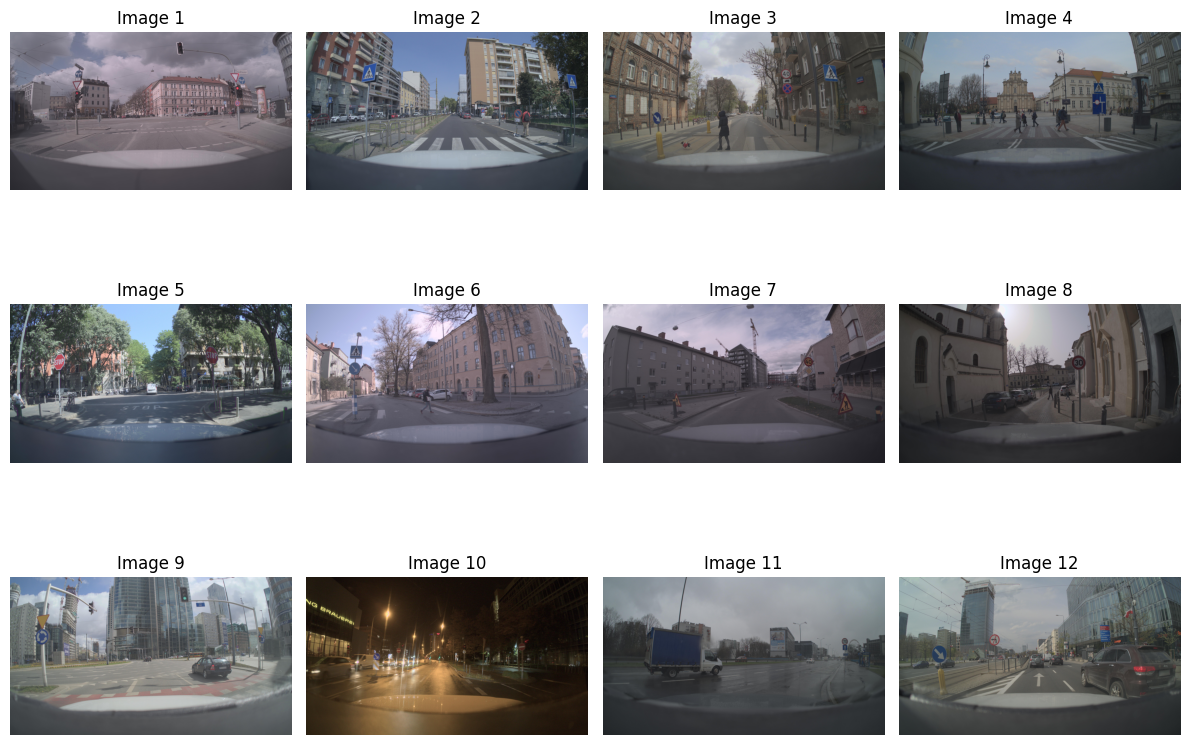

In [ ]:
# Cargamos las 12 imágenes de ./images/bt2'
images = load_images('./images/bt2')
i_names = [f'Image {i+1}' for i in range(len(images))]
plot_images(images, i_names)